## ANÁLISIS DE DATOS

### REGRESIÓN LÍNEAL

#### Julio César Ramos Guevara

##### Instalamos librerias necesarias

In [9]:
pip install numpy pandas seaborn scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [856]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Análisis Exploratorio

In [1660]:
# Cargamos el dataset y mostramos las 5 primeras lineas
df = pd.read_csv("CARDETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [1224]:
# Ver la medida del array cargado 
df.shape

(4340, 8)

In [1226]:
# Ver descripción general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [1228]:
# Ver resumen estadistico
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [1230]:
# Verificar valores nulos
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

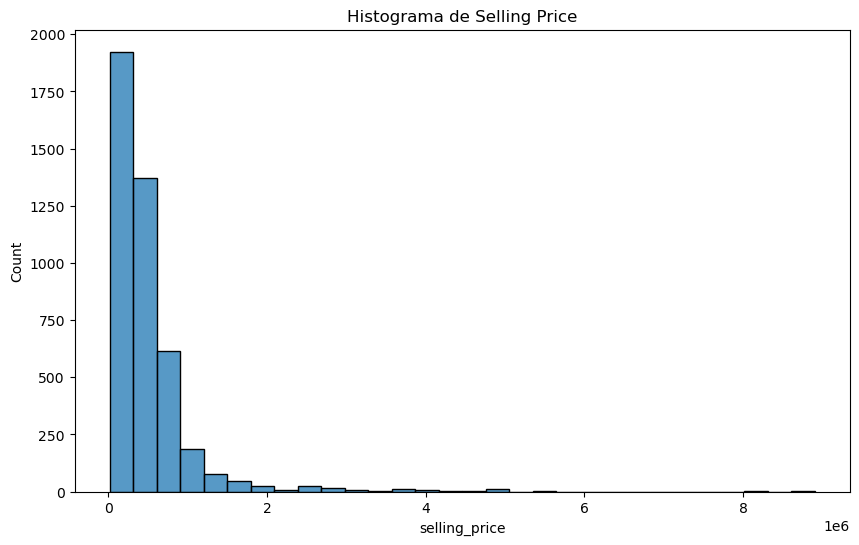

In [688]:
# Ver historico y grafica en función del objetivo
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30)
plt.title('Histograma de Selling Price')
plt.show()

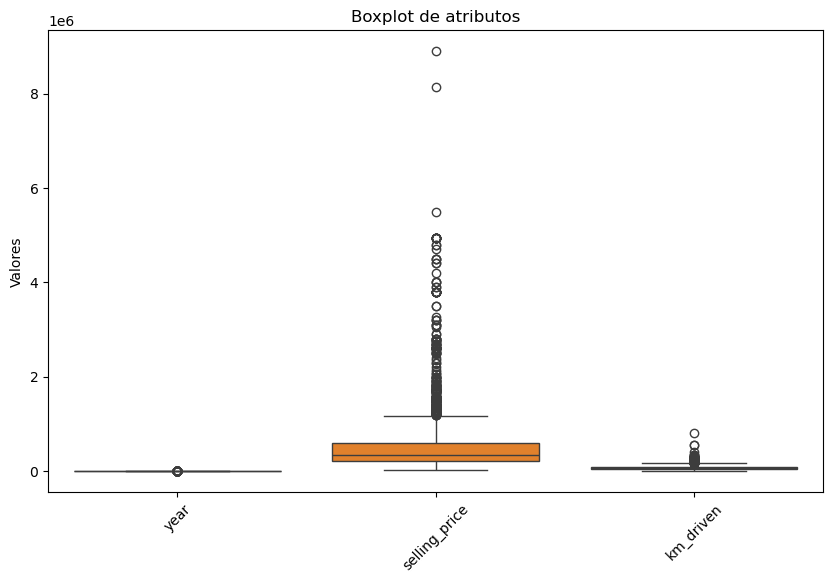

In [690]:
# Identificar valores atípicos
plt.figure(figsize = (10,6))
sns.boxplot(data = data[['year', 'selling_price', 'km_driven']])
plt.xticks(rotation = 45)
plt.title('Boxplot de atributos')
plt.ylabel('Valores')
plt.show()

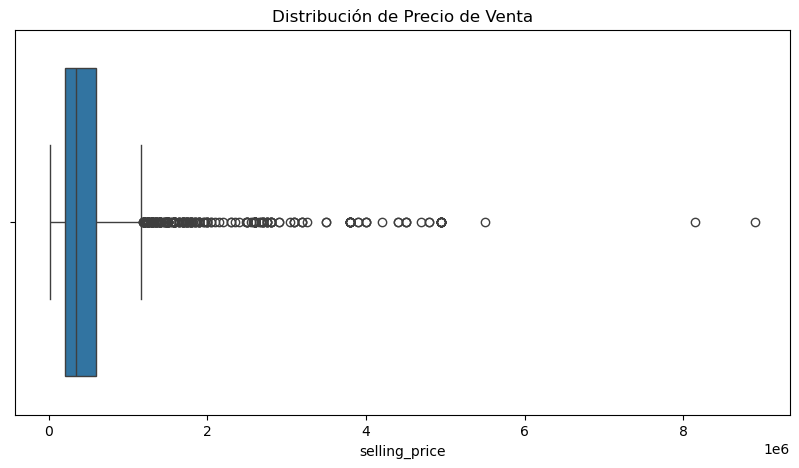

In [692]:
# Visualización de valores atípicos en varable objetivo
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['selling_price'])
plt.title('Distribución de Precio de Venta')
plt.show()

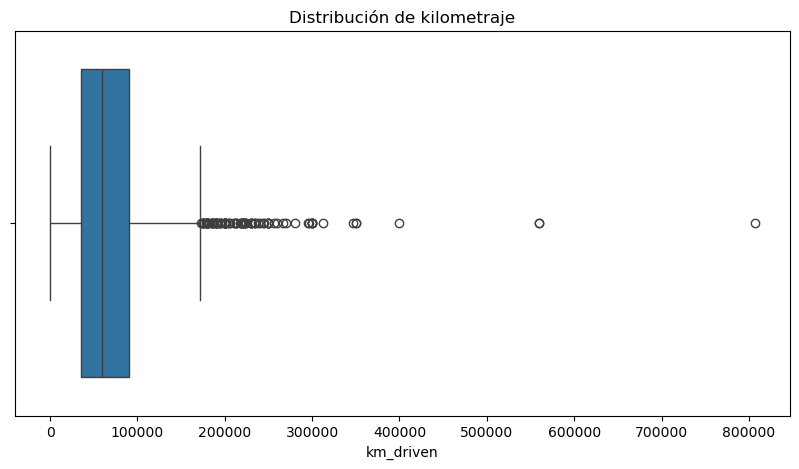

In [694]:
# Visualización de valores atípicos en kilometraje
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['km_driven'])
plt.title('Distribución de kilometraje')
plt.show()

### Extraemos los datos atípicos de selling_price para visualizar mejor

In [696]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

In [698]:
# Definir límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [700]:
# Crear un dataframe solo con los valores atípicos
outliers_price = df[(df['selling_price'] > upper_bound) | (df['selling_price'] < lower_bound)]
print(outliers_price)

                                      name  year  selling_price  km_driven  \
12         Toyota Corolla Altis 1.8 VL CVT  2018        1650000      25000   
25         Toyota Corolla Altis 1.8 VL CVT  2018        1650000      25000   
27             Hyundai Venue SX Opt Diesel  2019        1195000       5000   
29              Jaguar XF 2.2 Litre Luxury  2014        1964999      28000   
30    Mercedes-Benz New C-Class 220 CDI AT  2013        1425000      59000   
...                                    ...   ...            ...        ...   
4224            Toyota Fortuner 2.7 2WD AT  2016        2500000      70000   
4228               Mahindra XUV500 W10 AWD  2015        1225000      70000   
4304    Audi Q5 3.0 TDI Quattro Technology  2018        3899000      22000   
4311               Toyota Camry Hybrid 2.5  2017        1900000      20118   
4313    Ford Endeavour 2.2 Titanium AT 4X2  2019        2800000      10000   

        fuel seller_type transmission         owner  
12    Pet

### Podemos visualizar 271 valores atípicos de 4340

In [702]:
# Mostrar el tamaño del dataframe original y del filtrado
print("Tamaño original:", df.shape[0])
print("Tamaño filtrado:", outliers_price.shape[0])

Tamaño original: 4340
Tamaño filtrado: 271


In [704]:
# Contar la cantidad de vehículos por precio de venta
price_counts = df.groupby('selling_price').size()
print(price_counts)

selling_price
20000       1
22000       1
30000       1
35000       3
37500       1
           ..
4800000     2
4950000    11
5500000     1
8150000     1
8900000     1
Length: 445, dtype: int64


### Realizamos una categorización de selling_price para poder determinar las diferencias en precios

In [1662]:
# Definimos los bordes de los intervalos de precio
bins = [20000, 100000, 500000, 1000000, 9000000]  # Los límites de los intervalos
labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']      # Las etiquetas correspondientes

# Crear la categoría
df['price_category'] = pd.cut(df['selling_price'], bins=bins, labels=labels, right=False)

# Mostrar los primeros registros para verificar la categorización
print(df[['selling_price', 'price_category']].head())

   selling_price price_category
0          60000           Bajo
1         135000          Medio
2         600000           Alto
3         250000          Medio
4         450000          Medio


In [1664]:
# Verifica las categorías únicas
print(df['price_category'].unique())

# Cuenta cuántos registros hay por categoría
print(df['price_category'].value_counts())  

['Bajo', 'Medio', 'Alto', 'Muy Alto']
Categories (4, object): ['Bajo' < 'Medio' < 'Alto' < 'Muy Alto']
price_category
Medio       2459
Alto        1187
Muy Alto     374
Bajo         320
Name: count, dtype: int64


In [1627]:
# Verificar valores nulos
df.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
price_category    0
dtype: int64

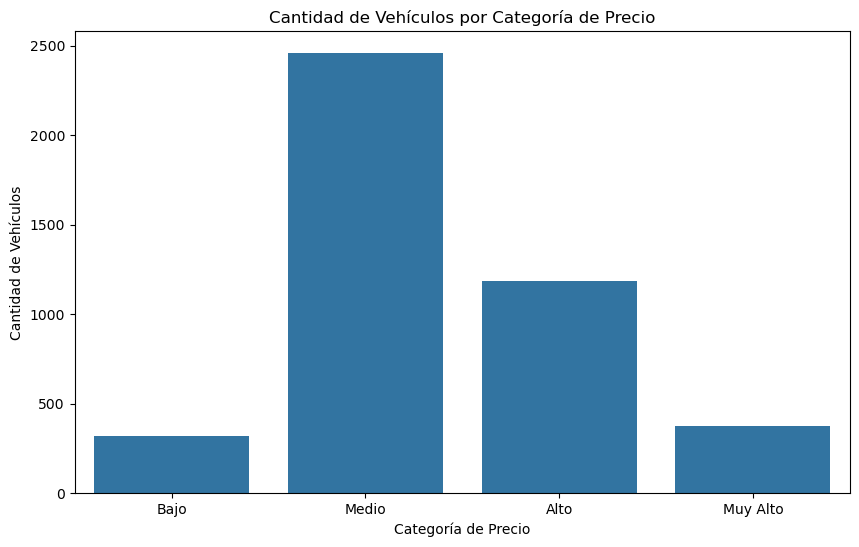

In [1629]:
# Visualización de categorización
plt.figure(figsize=(10, 6))
sns.countplot(x='price_category', data=df)
plt.title('Cantidad de Vehículos por Categoría de Precio')
plt.xlabel('Categoría de Precio')
plt.ylabel('Cantidad de Vehículos')
plt.show()

### Extraemos los datos atípicos de km_driven para visualizar mejor

In [710]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

In [712]:
# Definir límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [714]:
# Crear un dataframe solo con los valores atípicos
outliers_km = df[(df['km_driven'] > upper_bound) | (df['km_driven'] < lower_bound)]
print(outliers_km)

                                               name  year  selling_price  \
32                                  Audi Q5 2.0 TDI  2011        1190000   
69    Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII  2010         280000   
70                 Toyota Corolla Altis Diesel D4DG  2011         350000   
159                   Chevrolet Enjoy 1.3 TCDi LS 8  2015         300000   
197                                Mahindra Xylo E4  2009         229999   
...                                             ...   ...            ...   
4231    Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  2011         800000   
4255                         Mahindra XUV500 W8 2WD  2014         650000   
4275                         Mahindra XUV500 W8 2WD  2014         650000   
4286                         Fiat Punto 1.3 Emotion  2010         130000   
4331           Ford EcoSport 1.5 TDCi Titanium BSIV  2015         530000   

      km_driven    fuel seller_type transmission         owner price_category  
32     

### Podemos visualizar 110 valores atípicos de 4340

In [716]:
# Mostrar el tamaño del dataframe original y del filtrado
print("Tamaño original:", df.shape[0])
print("Tamaño filtrado:", outliers_km.shape[0])

Tamaño original: 4340
Tamaño filtrado: 110


In [718]:
# Contar la cantidad de vehículos por kilometraje
price_counts = df.groupby('km_driven').size()
print(price_counts)

km_driven
1          1
101        3
1000      18
1001       2
1010       7
          ..
347089     1
350000     2
400000     1
560000     2
806599     1
Length: 770, dtype: int64


### Realizamos una categorización de km_driven para poder determinar las diferencias en kilometraje

In [1666]:
# Definimos los bordes de los intervalos de kilometraje
bins = [10000, 50000, 150000, 300000, 900000]  
labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto'] 

# Crear la categoría
df['km_category'] = pd.cut(df['km_driven'], bins=bins, labels=labels, right=False)

# Mostrar los primeros registros para verificar la categorización
print(df[['km_driven', 'km_category']].head())

   km_driven km_category
0      70000       Medio
1      50000       Medio
2     100000       Medio
3      46000        Bajo
4     141000       Medio


In [1668]:
# Verifica las categorías únicas
print(df['km_category'].unique()) 

# Cuenta cuántos registros hay por categoría
print(df['km_category'].value_counts())  

['Medio', 'Bajo', NaN, 'Alto', 'Muy Alto']
Categories (4, object): ['Bajo' < 'Medio' < 'Alto' < 'Muy Alto']
km_category
Medio       2511
Bajo        1455
Alto         173
Muy Alto      13
Name: count, dtype: int64


In [1670]:
# Verificar valores nulos
df.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
price_category      0
km_category       188
dtype: int64

In [1672]:
# Rellenar nulos en una columna categórica con la moda 'km_category'
df['km_category'] = df['km_category'].fillna(df['km_category'].mode()[0])

In [1674]:
# Verificar la existencia de valores nulos
print("\nValores nulos en 'km_category' después de la limpieza:")
print(df['km_category'].isna().sum())


Valores nulos en 'km_category' después de la limpieza:
0


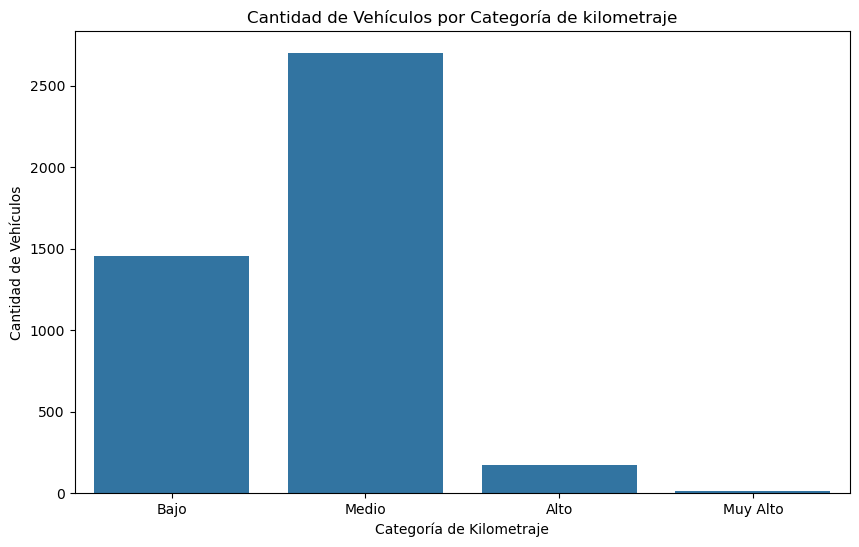

In [1641]:
# Visualización de categorización
plt.figure(figsize=(10, 6))
sns.countplot(x='km_category', data=df)
plt.title('Cantidad de Vehículos por Categoría de kilometraje')
plt.xlabel('Categoría de Kilometraje')
plt.ylabel('Cantidad de Vehículos')
plt.show()

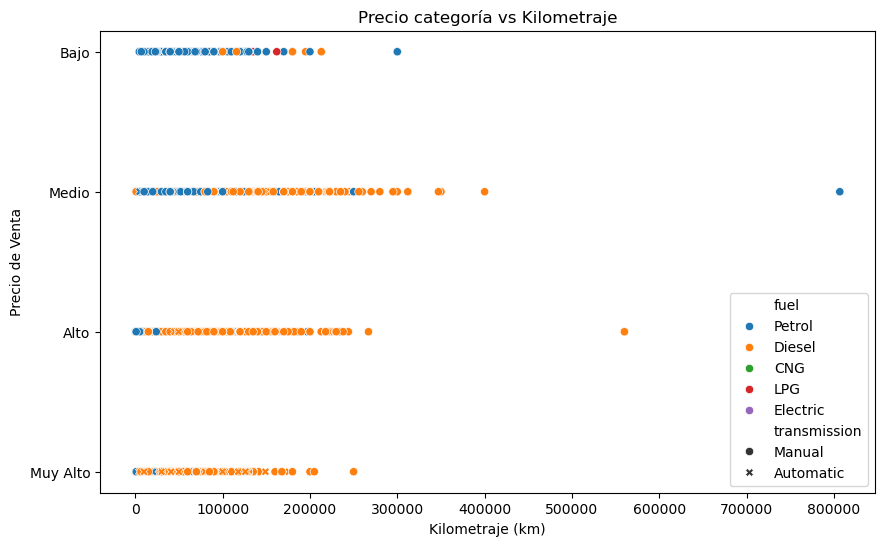

In [1643]:
# Gráfico de dispersión: Preciocategoría vs Kilometraje
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='price_category', hue='fuel', style='transmission')
plt.title('Precio categoría vs Kilometraje')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

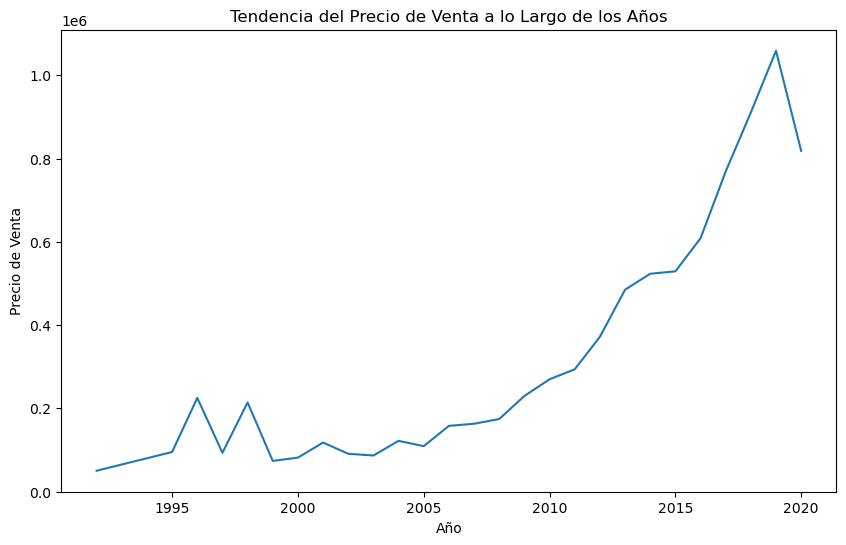

In [1645]:
# Análisis de tendencias a lo largo de los años
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='selling_price',errorbar=None)
plt.title('Tendencia del Precio de Venta a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.show()

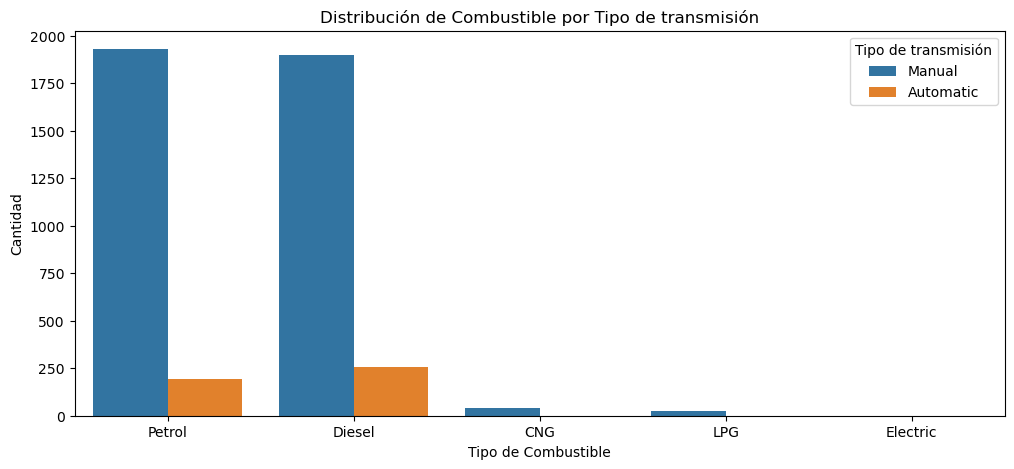

In [1647]:
# Contar las categorías de 'fuel' y 'transmission'
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='fuel', hue='transmission')
plt.title('Distribución de Combustible por Tipo de transmisión')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de transmisión')
plt.show()

### Validamos que el dataframe este limío antes de parar al preprocesammiento

In [1676]:
# Imprimir el dataframe limpio
print(df)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner price_category km_categ

## Preprocesamiento

In [1678]:
# Eliminar columnas no necesarias 'seller_type' no es relevante para la predicción
df = df.drop(columns=['seller_type'])

# Eliminar columnas no necesarias 'name' no es relevante para la predicción ya que estamos evaluando carros usados
df = df.drop(columns=['name'])

# Eliminar columnas no necesarias 'km_category' no es relevante para la predicción y ya tenemos km_driven con el que podemos trabajar
df = df.drop(columns=['km_category'])

In [1680]:
# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=['fuel','transmission','owner'], drop_first=True)

In [1682]:
# Verifica el DataFrame después de la transformación
df.head()

,year,selling_price,km_driven,price_category,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,Bajo,False,False,False,True,True,False,False,False,False
1,2007,135000,50000,Medio,False,False,False,True,True,False,False,False,False
2,2012,600000,100000,Alto,True,False,False,False,True,False,False,False,False
3,2017,250000,46000,Medio,False,False,False,True,True,False,False,False,False
4,2014,450000,141000,Medio,True,False,False,False,True,False,True,False,False


In [1684]:
print(df.dtypes)

year                             int64
selling_price                    int64
km_driven                        int64
price_category                category
fuel_Diesel                       bool
fuel_Electric                     bool
fuel_LPG                          bool
fuel_Petrol                       bool
transmission_Manual               bool
owner_Fourth & Above Owner        bool
owner_Second Owner                bool
owner_Test Drive Car              bool
owner_Third Owner                 bool
dtype: object


In [1686]:
# Comprobar valores nulos
print(df.isnull().sum())

year                          0
selling_price                 0
km_driven                     0
price_category                0
fuel_Diesel                   0
fuel_Electric                 0
fuel_LPG                      0
fuel_Petrol                   0
transmission_Manual           0
owner_Fourth & Above Owner    0
owner_Second Owner            0
owner_Test Drive Car          0
owner_Third Owner             0
dtype: int64


### Tranformamos la columna price_category con datos númericos por nivel

In [1688]:
from sklearn.preprocessing import LabelEncoder
lp = LabelEncoder()
df['price_category'] = lp.fit_transform(df['price_category'])

In [1690]:
# Verifica el DataFrame después de la transformación
df.head()

,year,selling_price,km_driven,price_category,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,1,False,False,False,True,True,False,False,False,False
1,2007,135000,50000,2,False,False,False,True,True,False,False,False,False
2,2012,600000,100000,0,True,False,False,False,True,False,False,False,False
3,2017,250000,46000,2,False,False,False,True,True,False,False,False,False
4,2014,450000,141000,2,True,False,False,False,True,False,True,False,False


### Dividimos el dataset según price_category para el manejo de datos atípicos en selling_price

In [1692]:
# Dividir el dataset por categoria de precios
df_bajo = df[df['price_category'] == 1]
df_medio = df[df['price_category'] == 2]
df_alto = df[df['price_category'] == 0]
df_muy_alto = df[df['price_category'] == 3]

In [1694]:
# Verifica cuántos registros hay en cada categoría
print(df_bajo.shape, df_medio.shape, df_alto.shape, df_muy_alto.shape)

(320, 13) (2459, 13) (1187, 13) (374, 13)


In [1696]:
# Visualizar columnas para asiganar las variables independientes al modelo
print(df.columns)

Index(['year', 'selling_price', 'km_driven', 'price_category', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


### Para trabajar el método regresión lineal en los dataset divididos creamos una función

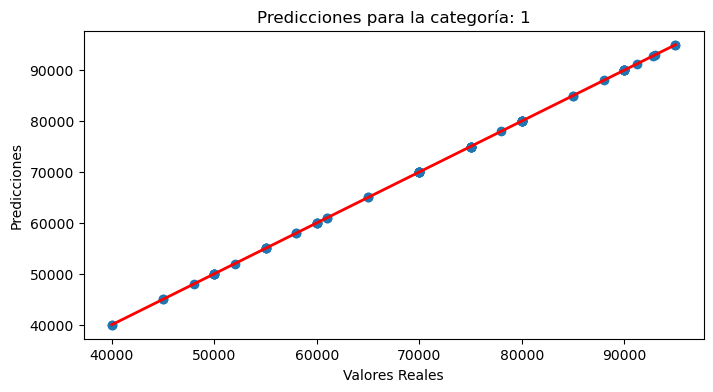

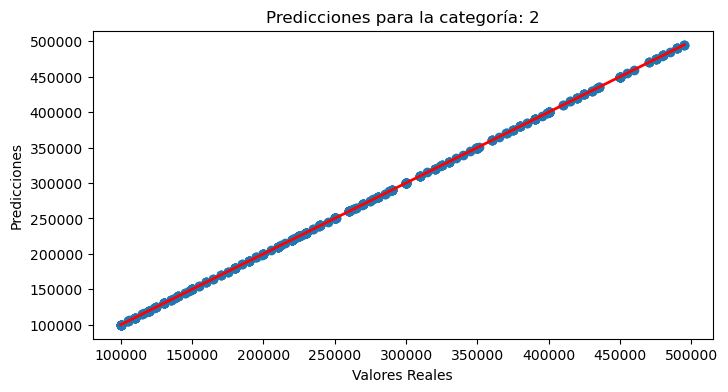

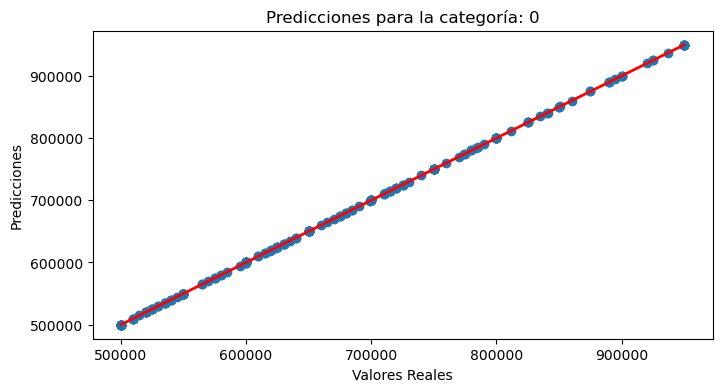

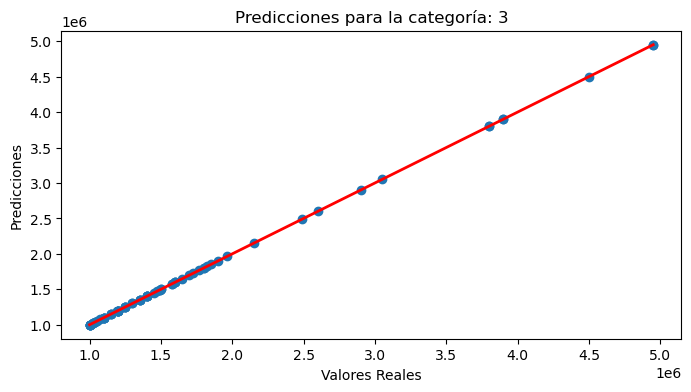

R² Scores: {'Bajo 0': 1.0, 'Medio 1': 1.0, 'Alto 2': 1.0, 'Muy Alto 3': 1.0}


In [1700]:
# Función para entrenar y evaluar el modelo
def entrenar_modelo(df):

    X = df[['year', 'selling_price', 'km_driven', 'price_category',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]  # Ajusta las variables independientes
    y = df['selling_price']

    # Dividir el dataset en train y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)


    # Hacer predicciones
    predicciones = modelo.predict(X_test)

    # Visualizar las predicciones frente a los valores reales
    metrics_results = {}
    
    for category in df['price_category'].unique():
        subset = df[df['price_category'] == category]
        plt.figure(figsize=(8, 4))
        plt.scatter(y_test, predicciones)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.title(f'Predicciones para la categoría: {category}')
        plt.show()

    # Evaluar el modelo (por ejemplo, usando R² o MSE)
    score = modelo.score(X_test, y_test)
    return score
    metrics_results[category] = {'R²': r2}
    
# Entrenar modelos para cada categoría
scores = {
    'Bajo 0': entrenar_modelo(df_bajo),
    'Medio 1': entrenar_modelo(df_medio),
    'Alto 2': entrenar_modelo(df_alto),
    'Muy Alto 3': entrenar_modelo(df_muy_alto)
}

print("R² Scores:", scores)

### Evaluamos el modelo ejecutando las métricas

In [1702]:
# Calcular métricas
mae = mean_absolute_error(y_test, predicciones)
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

# Mostrar resultados
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 5.945454881105933e-10
MSE: 8.154310951712222e-19
R²: 1.0


#### - Las métricas sugieren que el modelo tiene un rendimiento excepcional, 
#### lo que significa que puede estar capturando perfectamente la relación entre las variables.
#### - Cabe aclarar que para lograr el perfeccionamiento del modelo fue necesario dividir el dataset 
#### en función del precio de venta ya que presentaba demasiados valores atípicos pero importantes con 
#### una explicación lógica para cada uno.